<a href="https://colab.research.google.com/github/ben45123/AWS-Lambda-Research/blob/main/BehavioralDataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [8]:
# Cell 2: Load and preview data

# Define the file path for your Excel dataset in Google Colab
file_path = '/content/mobile-app-user-dataset.xlsx'

# Load the dataset from the Excel file
df = pd.read_excel(file_path)
df.head()

,id,date,surveyRespStatus,mobileDeviceManufacturer,mobileDeviceMain,appUse,appStore,appStoreFreq,monthlyDownloads,appSearch,...,pExtroverted,pCritical,pDependable,pAnxious,pOpenness,pReserved,pSympathetic,pDisorganized,pCalm,pConventional
0,0,date,"0=incomplete response, 1=complete response, 2=...",What mobile device do you use? Manufacturer name,What mobile device do you use?-Model name and ...,Do you use apps?,Which app store do you use?,How frequently do you visit the app store to l...,"On average, how many apps do you download a mo...",When do you look for apps? When feeling: depre...,...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...
1,2,2012-09-26 00:00:00,1,Apple,iPhone 4S,Yes,Apple App Store,4,4,"task,boredom,entertained,knowledge",...,6,3,7,2,6,3,4,3,4,4
2,3,2012-09-26 00:00:00,1,Apple,2,Yes,Apple App Store,7,3,"boredom,knowledge",...,4,4,5,2,3,3,5,3,5,3
3,4,2012-09-26 00:00:00,1,Samsung,galaxy Y,Yes,Google Play Store,2,1,task,...,4,3,6,3,5,5,5,2,5,3
4,5,2012-09-27 00:00:00,1,Apple,iphone 4,Yes,Apple App Store,5,2,"task,boredom,knowledge",...,2,6,4,3,6,5,7,3,5,3


In [9]:
# Cell 3: Drop unused columns
income_cols = [col for col in df.columns if col.startswith('income')]
df.drop(columns=income_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             6948 non-null   int64 
 1   date                           6948 non-null   object
 2   surveyRespStatus               6948 non-null   object
 3   mobileDeviceManufacturer       5729 non-null   object
 4   mobileDeviceMain               5842 non-null   object
 5   appUse                         5842 non-null   object
 6   appStore                       5846 non-null   object
 7   appStoreFreq                   5637 non-null   object
 8   monthlyDownloads               5637 non-null   object
 9   appSearch                      5498 non-null   object
 10  findApps                       5634 non-null   object
 11  chooseApps                     5400 non-null   object
 12  appDownload                    5402 non-null   object
 13  app

In [10]:
# Cell 4: Map ordinal variables to labels
af_map = {
    1: "Never", 2: "< Once/Month", 3: "Once/Month", 4: "> Once/Month",
    5: "Once/Week", 6: "> Once/Week", 7: "Once/Day", 8: "Several/Day", 9: "Other"
}
md_map = {
    1: "[0-1]", 2: "[2-5]", 3: "[6-10]", 4: "[11-20]",
    5: "[21-30]", 6: ">30"
}

df['appStoreFreq_num'] = pd.to_numeric(df['appStoreFreq'], errors='coerce')
df['appStoreFreq_desc'] = df['appStoreFreq_num'].map(af_map)

df['monthlyDownloads_num'] = pd.to_numeric(df['monthlyDownloads'], errors='coerce')
df['monthlyDownloads_desc'] = df['monthlyDownloads_num'].map(md_map)

appStoreFreq_desc
< Once/Month    1006
> Once/Month     644
> Once/Week     1002
Never            675
Once/Day         530
Once/Month       671
Once/Week        668
Other             41
Several/Day      399
Name: count, dtype: int64
monthlyDownloads_desc
>30          96
[0-1]      2138
[11-20]     380
[2-5]      2159
[21-30]     129
[6-10]      734
Name: count, dtype: int64


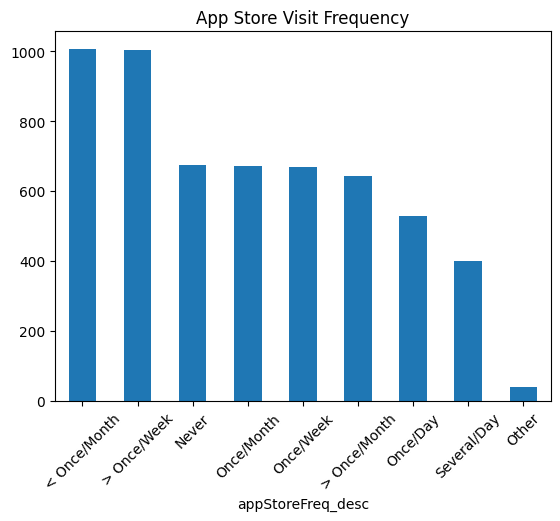

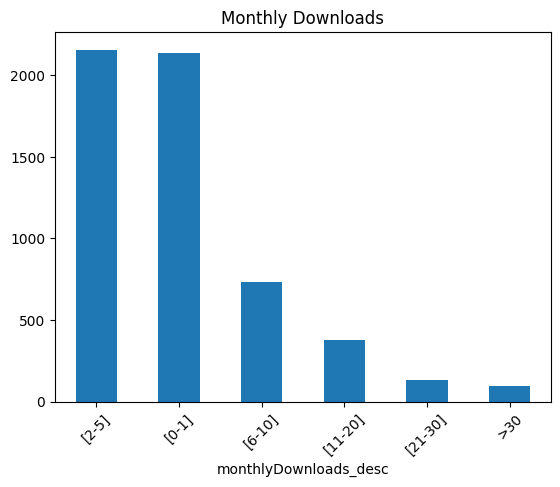

In [11]:
# Cell 5: Descriptive statistics & distributions
print(df['appStoreFreq_desc'].value_counts().sort_index())
print(df['monthlyDownloads_desc'].value_counts().sort_index())

df['appStoreFreq_desc'].value_counts().plot.bar(rot=45)
plt.title('App Store Visit Frequency')
plt.show()

df['monthlyDownloads_desc'].value_counts().plot.bar(rot=45)
plt.title('Monthly Downloads')
plt.show()

In [12]:
# Cell 6: Prepare train/test split
personality = [
    'pExtroverted','pCritical','pDependable','pAnxious',
    'pOpenness','pReserved','pSympathetic','pDisorganized',
    'pCalm','pConventional'
]

for col in personality + ['monthlyDownloads_num','appStoreFreq_num']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

data = df.dropna(subset=personality + ['monthlyDownloads_num','appStoreFreq_num'])
train, test = train_test_split(data, test_size=0.2, random_state=42)
print(f"Train samples: {len(train)}, Test samples: {len(test)}")

Train samples: 3858, Test samples: 965


In [13]:
# Cell 7: Fit OLS model and evaluate on hold-out
y_train = train['monthlyDownloads_num']
X_train = sm.add_constant(train[['appStoreFreq_num'] + personality])

y_test = test['monthlyDownloads_num']
X_test = sm.add_constant(test[['appStoreFreq_num'] + personality])

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

preds = model.predict(X_test)
rmse = np.sqrt(((preds - y_test)**2).mean())
print(f"Test RMSE: {rmse:.3f}")

                             OLS Regression Results                             
Dep. Variable:     monthlyDownloads_num   R-squared:                       0.434
Model:                              OLS   Adj. R-squared:                  0.432
Method:                   Least Squares   F-statistic:                     268.2
Date:                  Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                          19:27:25   Log-Likelihood:                -4853.0
No. Observations:                  3858   AIC:                             9730.
Df Residuals:                      3846   BIC:                             9805.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

In [14]:
# Cell 8: Highlight top predictors
top5 = model.params.drop('const').abs().sort_values(ascending=False).head(5)
print("Top 5 predictors by absolute coefficient value:\n", top5)

Top 5 predictors by absolute coefficient value:
 appStoreFreq_num    0.339505
pExtroverted        0.035303
pAnxious            0.026444
pCritical           0.026224
pDisorganized       0.017976
dtype: float64
